### Visualisation using Matplotlib, Seaborn and Folium

In [21]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns   
import folium
import warnings 
%matplotlib inline 



### Importing Data

In [22]:

# Import dataset from IBM DS course server
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [23]:
# Check dataset
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [24]:

df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [25]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


### Create Visualisations for Data Analysis


**Plot a line graph using pandas to show automobile sales fluctuation across the years.**

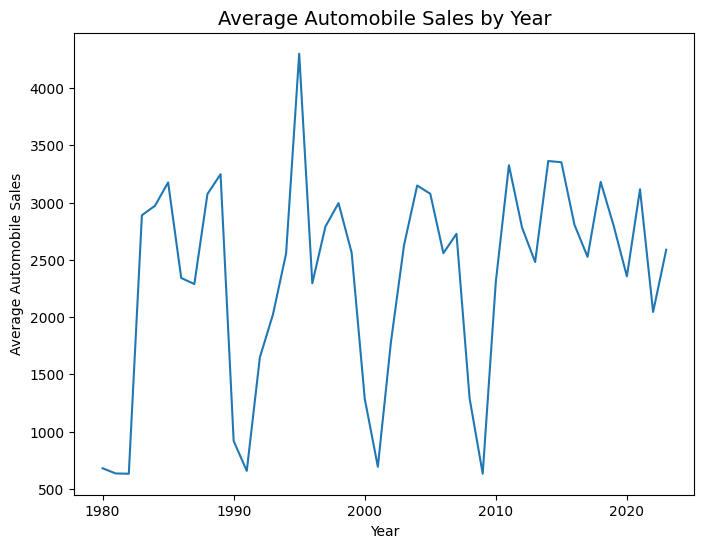

In [26]:
# Create data for line plot
df_line = df.groupby(["Year"])["Automobile_Sales"].mean()

plt.figure(figsize = (8, 6))
df_line.plot()
plt.title("Average Automobile Sales by Year", fontsize = 14)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Average Automobile Sales", fontsize = 10)

plt.show()

**Customise the plot above. Change x-axis to show all the years, and add anotation to the plot to identify recession years for at least 2 years.**

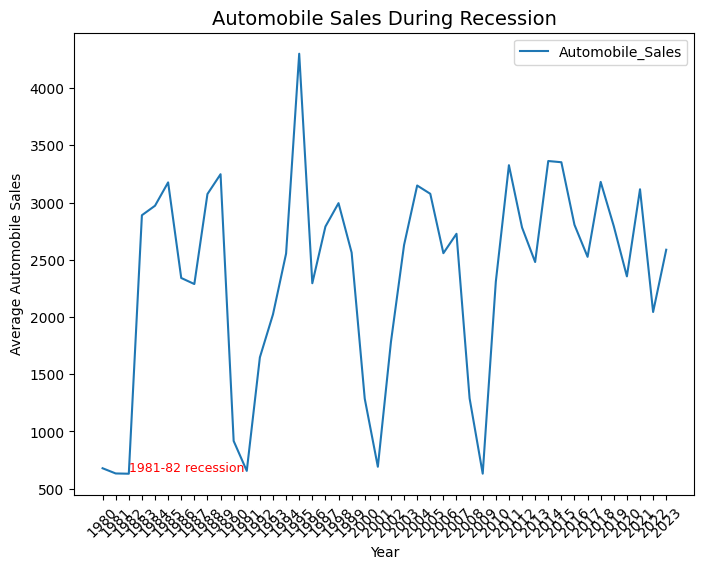

In [27]:
# Plot with annotation
df_line = df.groupby(["Year"])["Automobile_Sales"].mean()

plt.figure(figsize = (8, 6))
df_line.plot()
plt.title("Automobile Sales During Recession", fontsize = 14)
plt.xlabel("Year", fontsize = 10)
plt.xticks(ticks = np.arange(1980, 2024), rotation = 45)
plt.ylabel("Average Automobile Sales", fontsize = 10)
plt.text(1982, 650, "1981-82 recession", fontsize = 9, color = "red")
plt.legend()

plt.show()


**Plot different lines for categories of vehicle type and analyse the trend to identify whether there is a noticeable difference in sales trends between different vehicle types during the recession period.**

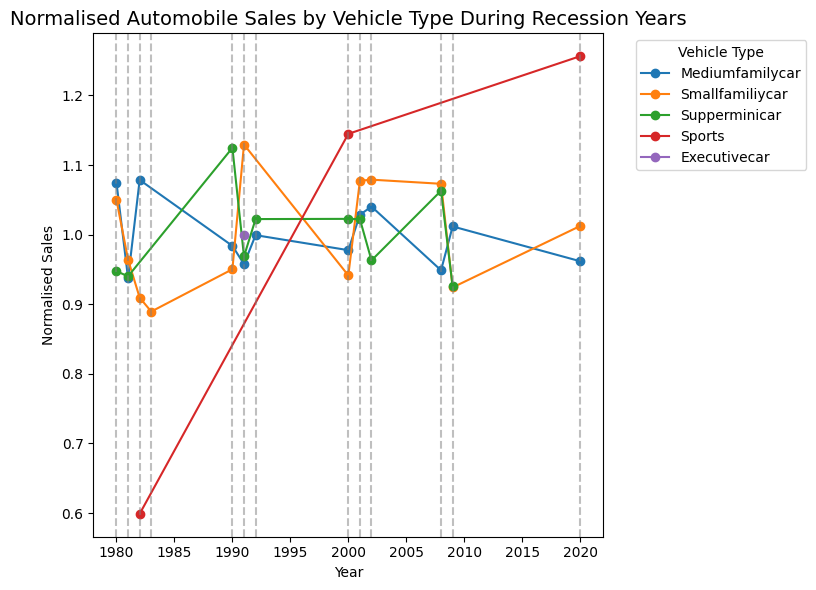

In [28]:
# Create data for line plot
df_rec = df[df["Recession"] == 1]

# Calculate average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(["Year", "Vehicle_Type"], as_index = False)['Automobile_Sales'].mean()

# Calculate the normalised sales by dividing the average sales for each vehicle type
df_Mline["Normalized_Sales"] = df_Mline.groupby("Vehicle_Type")['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set Year as index
df_Mline.set_index("Year", inplace = True)

# Create the plot for each vehicle type
plt.figure(figsize = (8, 6))
for vehicle_type in df_Mline["Vehicle_Type"].unique():
    data = df_Mline[df_Mline["Vehicle_Type"] == vehicle_type]
    plt.plot(data.index, data["Normalized_Sales"], label = vehicle_type, marker = "o")

# Highlight recession years
recession_years = df_rec["Year"].unique()
for year in recession_years:
    plt.axvline(x = year, color = "gray", linestyle = "--", alpha = 0.5)
    
# Add title, labels and legend
plt.title("Normalised Automobile Sales by Vehicle Type During Recession Years", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Normalised Sales")
plt.legend(title = "Vehicle Type", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.tight_layout()
plt.show()


* From the above plot, insights can be inferred on the sales of various vehicle type:
   * Sports cars and super mini cars show resilience or growth during the recession periods. 
   * Medium family cars and to a lesser extent, small family cars show more sensitivity to economic changes, with a less consisited trends.
   * The upward trend in sports vehicles sales indicates stability of the luxury market, even during economic downturns.

**Create bar plot visualisation using Seaborn functionality to compare between sales trend per vehicle type during recession and non-recession period.**

In [29]:
# Create new data for plotting
new_df = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()
new_df.head()

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


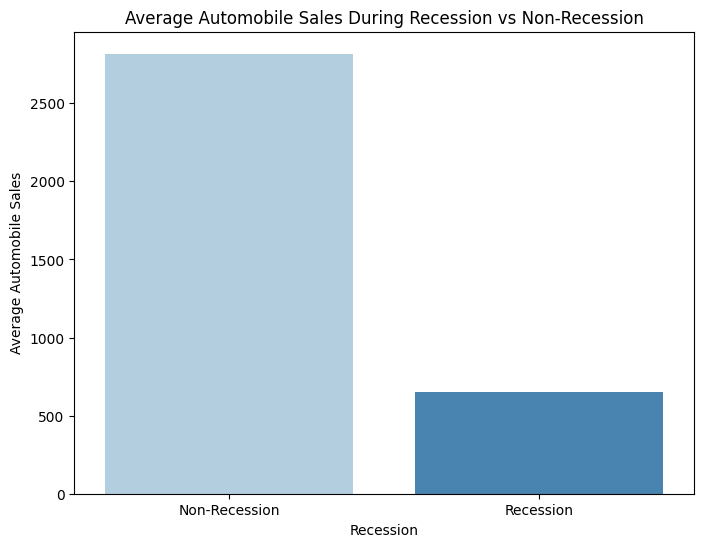

In [30]:
# Create bar plot
plt.figure(figsize = (8, 6))
sns.barplot(data = new_df, x = "Recession", y = "Automobile_Sales", hue = "Recession", palette = "Blues", legend = False)
plt.title("Average Automobile Sales During Recession vs Non-Recession", fontsize = 12)
plt.xlabel("Recession", fontsize = 10)
plt.ylabel("Average Automobile Sales", fontsize = 10)
plt.xticks(ticks=[0, 1], labels = ["Non-Recession", "Recession"])

plt.show()

**Compare the sales of different vehicle types during a recession and a non-recession period.**

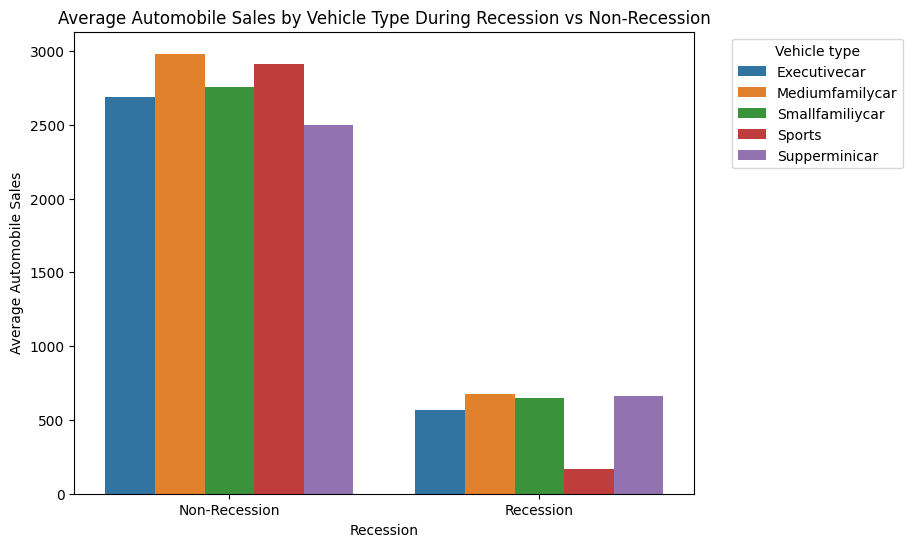

In [31]:

# Create data for vehicle type barplot
vehicle_df = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

# Create barplot
plt.figure(figsize = (8, 6))
sns.barplot(data = vehicle_df, x = "Recession", y = "Automobile_Sales", hue = "Vehicle_Type")
plt.title("Average Automobile Sales by Vehicle Type During Recession vs Non-Recession", fontsize = 12)
plt.xlabel("Recession", fontsize = 10)
plt.ylabel("Average Automobile Sales", fontsize = 10)
plt.xticks(ticks=[0, 1], labels = ["Non-Recession", "Recession"])
plt.legend(title = "Vehicle type", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.show()

* From the above chart, insights can be generated on the overall sales of automobiles during recession:
   * From the graph, it is evident that automobile sales are generally lower during recession periods compared to non-recession periods. This indicates that economic downturns have a negative impact on automobile sales, likely due to reduced consumer spending and financial uncertainty.

**Create line plots and use subplotting to compare the variations in GDP during recession and non-recession period. Observe how GDP varies over time during these time.**

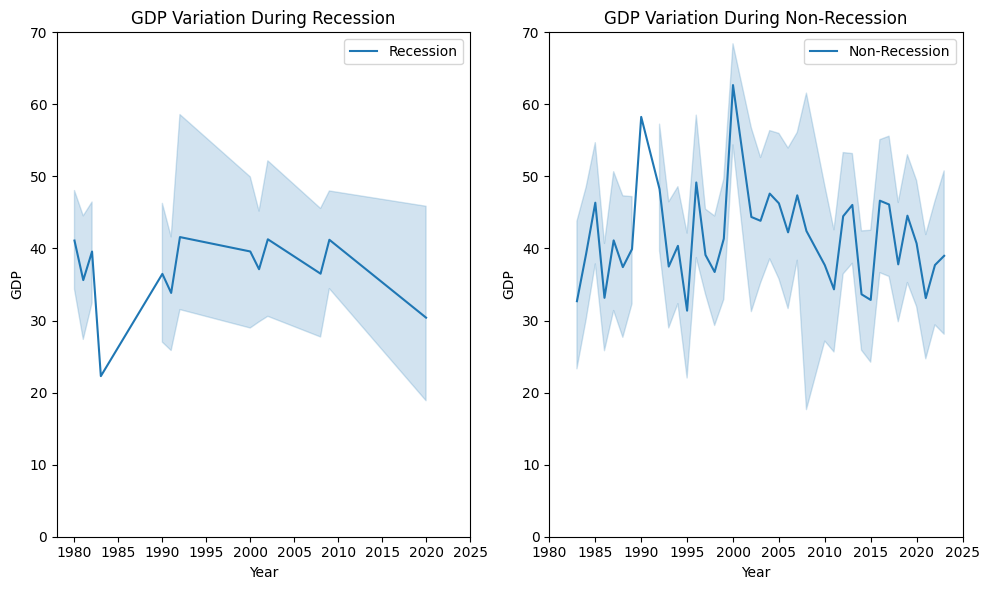

In [32]:

# Create dataframes for recession and non-recession period
recession_df = df[df["Recession"] == 1]
non_recess_df = df[df["Recession"] == 0]

# Plot holder
fig = plt.figure(figsize = (10, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Plot first subplot (1, 2, 1)
sns.lineplot(data = recession_df, x = "Year", y = "GDP", label = "Recession", ax = ax0)
ax0.set_xlabel("Year")
ax0.set_xticks(ticks = np.arange(1980, 2026, 5))
ax0.set_ylabel("GDP")
ax0.set_ylim(0, 70)
ax0.set_title("GDP Variation During Recession")

# Plot second subplot (1, 2, 2)
sns.lineplot(data = non_recess_df, x = "Year", y = "GDP", label = "Non-Recession", ax = ax1)
ax1.set_xlabel("Year")
ax1.set_xticks(ticks = np.arange(1980, 2026, 5))
ax1.set_ylabel("GDP")
ax1.set_ylim(0, 70)
ax1.set_title("GDP Variation During Non-Recession")

plt.tight_layout()
plt.show()

* From the above plots, it is evident that the GDP was in the lower range during recession, affecting overall sales of the company.


**Develop Bubble plot to display the impact of seasons on Automobile Sales.**
   * How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend.
   * Use Bubble plot to display Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble.

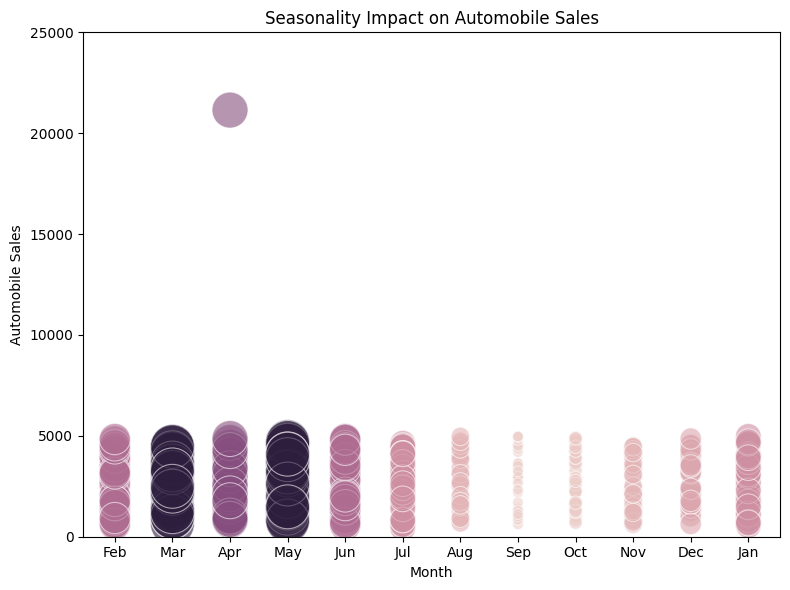

In [33]:

# Create data for Bubble plot
non_recess_data = df[df["Recession"] == 0]
size = non_recess_data["Seasonality_Weight"] * 100 # for bubble effect & better visibility

# Create plot holder
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data = non_recess_data, x = "Month", y = "Automobile_Sales", size = size, hue = "Seasonality_Weight",
                legend = False, sizes = (60, 1000), alpha = 0.6)
plt.title("Seasonality Impact on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.ylim(0, 25000)

plt.tight_layout()
plt.show()


* From this Bubble plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.


**Use Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.**
   * From the scatter plot, identify if there a correlation between consumer confidence and automobile sales during recession period.

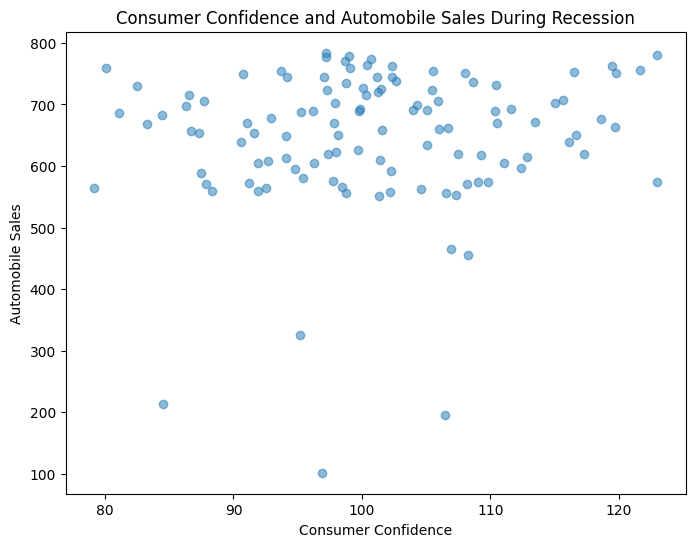

In [34]:

# Create data for scatter plot
rec_data = df[df["Recession"] == 1]

# Create scatter plot
fig = plt.figure(figsize = (8, 6))
plt.scatter(data = rec_data, x = "Consumer_Confidence", y = "Automobile_Sales", alpha = 0.5)
plt.title("Consumer Confidence and Automobile Sales During Recession")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")

plt.show()

* The scatter plot above show no correlation between consumer confidence and automobile sales during recession.


**Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession period.**
   * Did the advertising expenditure change during recession?

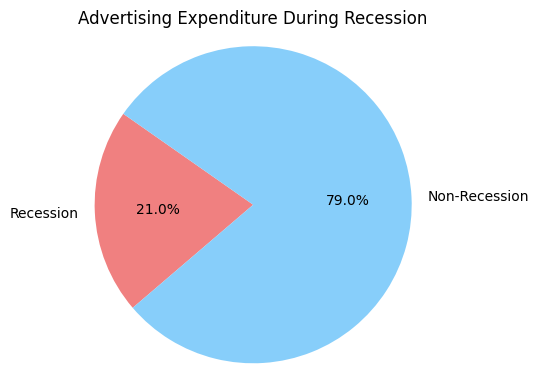

In [35]:
# Create recession dataframe for pie chart
rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]   

# Calculate total advertising expenditure for recession and non-recession period
rec_advert_expenses = rec_df["Advertising_Expenditure"].sum()
non_rec_advert_expenses = non_rec_df["Advertising_Expenditure"].sum()

# Create pie chart for each advertising expenditure
plt.figure(figsize = (4.5, 4.5))

labels = ["Recession", "Non-Recession"]
sizes = [rec_advert_expenses, non_rec_advert_expenses]
colors = ["lightcoral","lightskyblue"]
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 145)
plt.title("Advertising Expenditure During Recession")
plt.axis("equal") # Equal aspect ratio ensuring pie is drawn as a circle


plt.show()


* XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. 


**Create a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.**

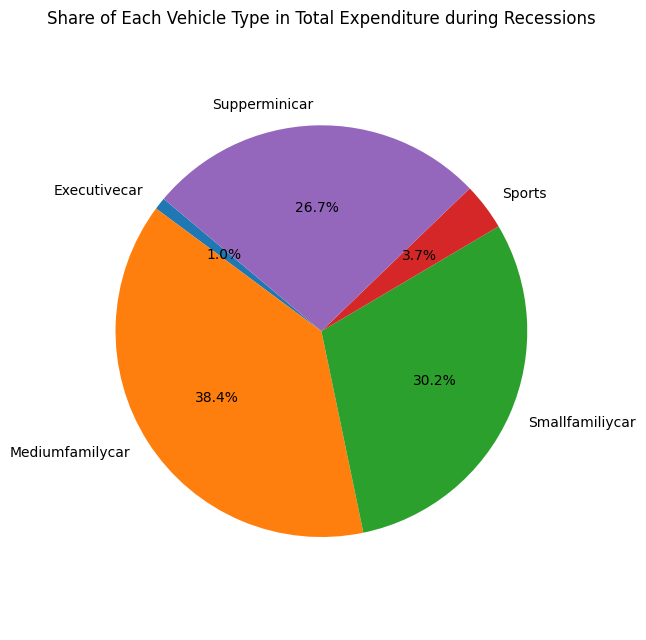

In [36]:
# Create recession dataframe for pie chart
rec_df = df[df['Recession'] == 1]

# Group by vehicle type and sum of the advertising expenditure during recession period
rec_vehicle_exp = rec_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart for advertising expenditure by vehicle type during recession period
plt.figure(figsize = (6.5, 6.5))
labels = rec_vehicle_exp.index
sizes = rec_vehicle_exp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


* During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


**Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.**

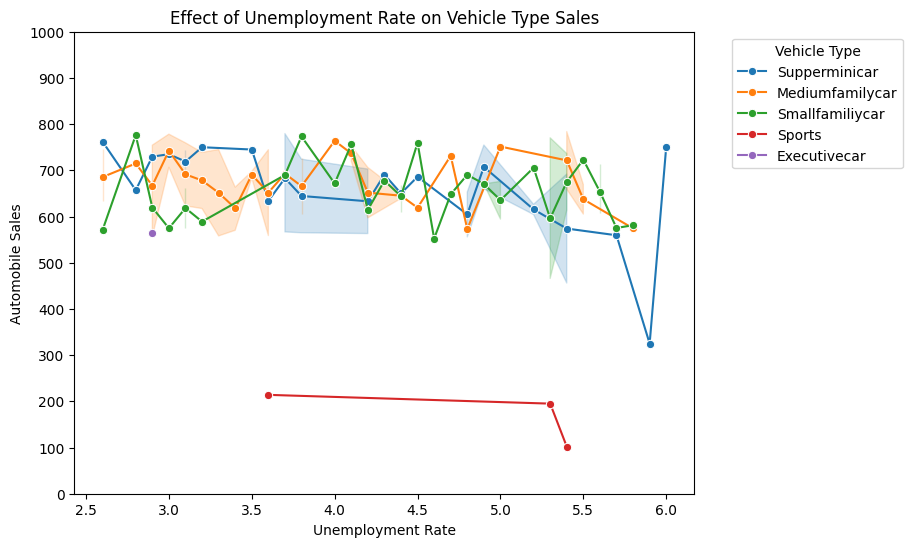

In [37]:

# Create dataframe for recession period
rec_df = df[df["Recession"] == 1]

# Create lineplot of unemployment rate and automobile sales per vehicle type using Seaborn functionality
plt.figure(figsize = (8, 6))
sns.lineplot(data = rec_df, x = "unemployment_rate", y = "Automobile_Sales", hue = "Vehicle_Type", marker = "o")
plt.title("Effect of Unemployment Rate on Vehicle Type Sales")
plt.xlabel("Unemployment Rate")
#plt.xticks(np.arange(2.5, 6.5, 0.5))
plt.ylabel("Automobile Sales")
plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1001, 100))
plt.legend(title = "Vehicle Type", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.show()



* During recession, buying pattern changed, the sales of low range vehicle like superminicar increases as unemployment rate rise.


**Create a map on the hightest sales region/offices of the company during recession period**

In [38]:

# Import data from IBM DS course server
import requests

# Get data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
filename = "us-states.json"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)

else:
    print("Failed to download data.")

In [39]:

# Create recession period dataframe for the map
rec_df = df[df["Recession"] == 1]

# Filter data for recession period and group by region to get total sales
rec_region_sales = df[df["Recession"] == 1].groupby("City", as_index = False)["Automobile_Sales"].sum()

In [40]:

# Create base map centered around the US
map1 = folium.Map(location = [37.0902, -95.7129], zoom_start = 4)

# Create a choropleth map to visualise sales by City using Folium
choropleth = folium.Choropleth(
    geo_data = "us-states.json",
    data = rec_region_sales,
    columns = ["City", "Automobile_Sales"],
    key_on = "feature.properties.name",
    fill_color = "YlGn",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Total Automobile Sales During Recession").add_to(map1)

# Add tooltips to show city names and sales
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(["name"], labels = True))

# Display map
map1
